# Evaluation: Precision & Recall

Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics.

We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 

In [20]:
# Libraries
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# Load data
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

#### Now take a look at the shapes of the X and y matrices.

In [5]:
# your code here
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

#### Let's pick one entry and see what number is written. Use indexing to pick the 35th digit.

In [9]:
# your code here

X[35]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

####  Use the *reshape(28,28)* method and *plt.imshow()* function with the parameters *cmap = matplotlib.cm.binary* and *interpolation="nearest"* to make a plot of the number. Be sure to import matplotlib.

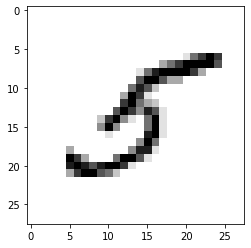

In [12]:
# your code here
number = X[35].reshape(28,28)
plt.imshow(number, cmap = plt.cm.binary, interpolation = "nearest")

#### Use indexing to see if what the plot shows matches with the outcome of the 35th index.

In [13]:
# your code here
y[35]

'5'

#### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training and the rest for testing.

In [14]:
# your code here
X_train, X_test, y_train, y_test = X[:60000],  X[60000:], y[:60000], y[60000:]

#### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5.

In [16]:
# your code here

y_train_just5 = [1 if i== '5' else 0 for i in y_train]
y_test_just5 = [1 if i== '5' else 0 for i in y_test]
# y_train_5 = np.where(y_train == '5', 1, 0)
# y_test_5 = np.where(y_test == '5', 1, 0)

#### Lets train a logistic regression to predict if a number is a 5 or not. Remember to use the 'just 5s' target train array.

In [17]:
# your code here
model = LogisticRegression().fit(X_train, y_train_just5)

c:\users\miguestepa\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Does the classifier predict correctly the 35th digit we picked before?

In [18]:
# your code here
y_pred = model.predict(X_train)
y_pred[35]

1

In [ ]:
# your comments here
'It did the prediction right.'

#### The 36000th value is a 9. Check if it was correctly predicted.

In [19]:
# your code here
y_pred[36000]

0

In [ ]:
# your comments here
'Seems nice'

#### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below.

In [21]:
# Libraries
from sklearn.base import BaseEstimator

In [22]:
# Dumb classifier
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1))[:, 0]

never_5_clf = Never5Classifier()

#### Now lets fit and predict on the testing set using our dumb classifier.

In [47]:
# your code here
never_5_clf.fit(X_train)
never_5_pred = never_5_clf.predict(X_test)
never_5_pred

array([0., 0., 0., ..., 0., 0., 0.])

#### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [29]:
# your code here
print(classification_report(y_test_just5,never_5_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      9108
           1       0.00      0.00      0.00       892

    accuracy                           0.91     10000
   macro avg       0.46      0.50      0.48     10000
weighted avg       0.83      0.91      0.87     10000



c:\users\miguestepa\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [30]:
# your answer here
'''Logistic regression is more accurate, 
recall is better for binary options'''

'Logistic regression is more accurate, \nrecall is better for binary options'

#### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each.

In [39]:
# your code here
from sklearn.metrics import roc_curve
fpr_no_5, tpr_no_5, thresholds_no_5 = roc_curve(y_test_just5,never_5_pred)
print(fpr_no_5)
print(tpr_no_5)
print(thresholds_no_5)

[0. 1.]
[0. 1.]
[1. 0.]


In [49]:
fpr_5, tpr_5, thresholds_5 = roc_curve(y_test_just5,y_pred)
print(fpr_5)
print(tpr_5)
print(thresholds_5)

ValueError: Found input variables with inconsistent numbers of samples: [10000, 60000]

#### Now find the roc_auc_score for each. 

In [48]:
# your code here
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_just5,never_5_pred)



0.5

#### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# your answer here